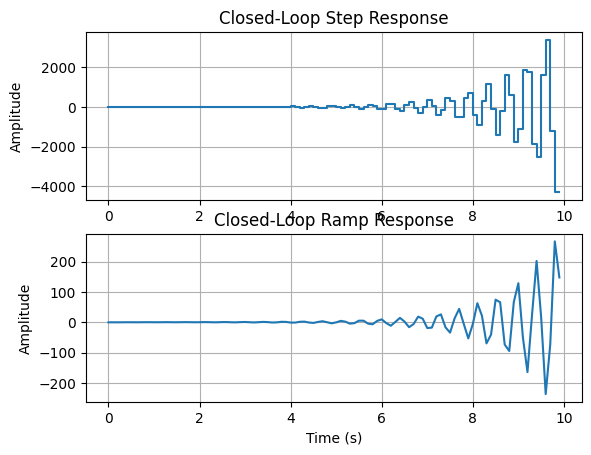

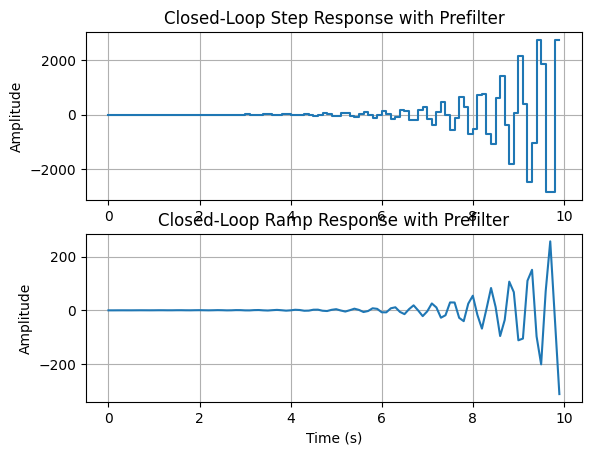

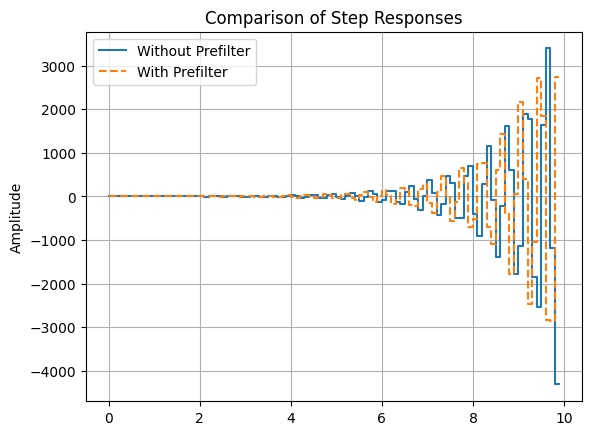

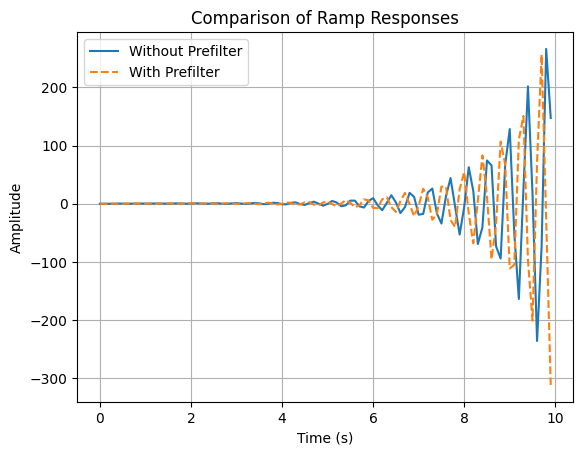

In [8]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Define the sample time
Ts = 0.1  # Sample time

# Define the open-loop transfer function
num_GH = [1]
den_GH = [1, -0.6, 0.09]
GH = signal.dlti(num_GH, den_GH, dt=Ts)

# Define the controller D(z)
K = 1  # Gain to be determined
num_D = [K, -K]
den_D = [1, -0.5]
D = signal.dlti(num_D, den_D, dt=Ts)

# Closed-loop transfer function
num_cl = np.polymul(num_D, num_GH)
den_cl = np.polyadd(np.polymul(den_D, den_GH), np.polymul(num_D, num_GH))
sys_cl = signal.dlti(num_cl, den_cl, dt=Ts)

# Time vector
t = np.arange(0, 10, Ts)

# Step response
t_step, y_step = signal.dstep(sys_cl)
y_step = np.squeeze(y_step)

plt.figure()
plt.subplot(2, 1, 1)
plt.step(t_step, y_step)
plt.title('Closed-Loop Step Response')
plt.ylabel('Amplitude')
plt.grid()

# Ramp response
ramp_input = t
t_ramp, y_ramp = signal.dlsim(sys_cl, ramp_input)

plt.subplot(2, 1, 2)
plt.plot(t_ramp, y_ramp)
plt.title('Closed-Loop Ramp Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Part (c): Prefilter design
desired_poles = [0.5 + 0.5j, 0.5 - 0.5j]  # Desired poles
desired_char_eq = np.poly(desired_poles)

num_F = desired_char_eq
den_F = den_D
F = signal.dlti(num_F, den_F, dt=Ts)

# System with prefilter
num_cl_prefilter = np.polymul(num_F, num_cl)
den_cl_prefilter = np.polymul(den_F, den_cl)
sys_cl_prefilter = signal.dlti(num_cl_prefilter, den_cl_prefilter, dt=Ts)

# Step response with prefilter
t_step_prefilter, y_step_prefilter = signal.dstep(sys_cl_prefilter)
y_step_prefilter = np.squeeze(y_step_prefilter)

plt.figure()
plt.subplot(2, 1, 1)
plt.step(t_step_prefilter, y_step_prefilter)
plt.title('Closed-Loop Step Response with Prefilter')
plt.ylabel('Amplitude')
plt.grid()

# Ramp response with prefilter
t_ramp_prefilter, y_ramp_prefilter = signal.dlsim(sys_cl_prefilter, ramp_input)

plt.subplot(2, 1, 2)
plt.plot(t_ramp_prefilter, y_ramp_prefilter)
plt.title('Closed-Loop Ramp Response with Prefilter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Part (d): Comparison of results
plt.figure()
plt.step(t_step, y_step, label='Without Prefilter')
plt.step(t_step_prefilter, y_step_prefilter, label='With Prefilter', linestyle='--')
plt.title('Comparison of Step Responses')
plt.legend()
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure()
plt.plot(t_ramp, y_ramp, label='Without Prefilter')
plt.plot(t_ramp_prefilter, y_ramp_prefilter, label='With Prefilter', linestyle='--')
plt.title('Comparison of Ramp Responses')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

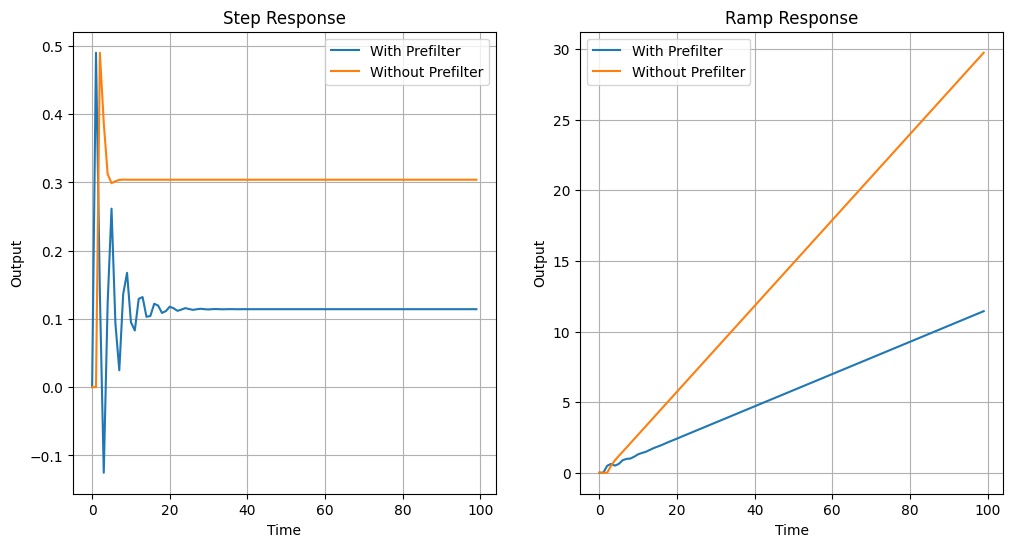

In [27]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Plant transfer function G(z)
def G(z):
    return 1 / (z - 0.3)**2

# Controller parameter calculation
p_c = 0  # Controller pole at origin
K = 0.49 
z_c = 0.51

# Controller transfer function D(z)
def D(z):
    return K * (z - z_c) / (z - p_c)

# Prefilter transfer function F(z)
def F(z):
    return (z - z_c)


# Define closed-loop system with prefilter
num_DG = np.polymul([K], np.polymul([1, -z_c], np.poly1d([1]))) # Numerator of D(z)*G(z)
den_DG = np.polymul([1, -p_c], np.poly1d([1, -0.3, 0.09]))       # Denominator of D(z)*G(z)
num_cl_with_prefilter = np.polymul(num_DG, np.poly1d([1, -z_c]))   # Numerator of closed-loop TF with prefilter
den_cl_with_prefilter = np.polyadd(den_DG, num_DG)               # Denominator of closed-loop TF with prefilter
closed_loop_system_with_prefilter = signal.dlti(num_cl_with_prefilter, den_cl_with_prefilter, dt=1)

# Define closed-loop system without prefilter
num_cl_without_prefilter = num_DG
den_cl_without_prefilter = den_DG
closed_loop_system_without_prefilter = signal.dlti(num_cl_without_prefilter, den_cl_without_prefilter, dt=1)


# Step input
t, y_step_with_prefilter = signal.dlsim(closed_loop_system_with_prefilter, np.ones(100))  # Step response with prefilter
t, y_step_without_prefilter = signal.dlsim(closed_loop_system_without_prefilter, np.ones(100))  # Step response without prefilter

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(t, y_step_with_prefilter, label='With Prefilter')
plt.plot(t, y_step_without_prefilter, label='Without Prefilter')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.legend()
plt.grid(True)

# Ramp input
ramp_input = np.arange(100)

t, y_ramp_with_prefilter = signal.dlsim(closed_loop_system_with_prefilter, ramp_input)  # Ramp response with prefilter
t, y_ramp_without_prefilter = signal.dlsim(closed_loop_system_without_prefilter, ramp_input)  # Ramp response without prefilter

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(t, y_ramp_with_prefilter, label='With Prefilter')
plt.plot(t, y_ramp_without_prefilter, label='Without Prefilter')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Ramp Response')
plt.legend()
plt.grid(True)

plt.show()


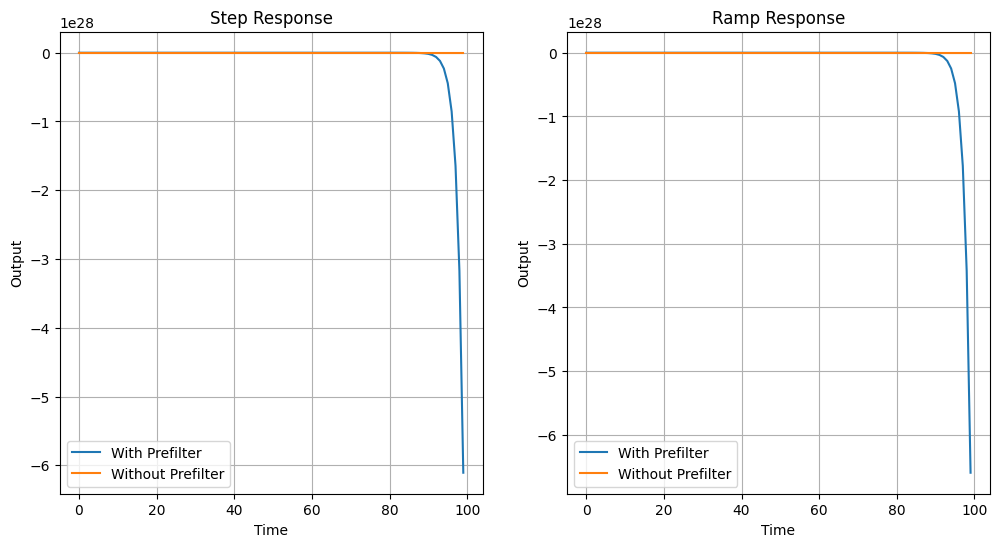

In [29]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Plant transfer function G(z)
def G(z):
    return 1 / (z - 0.3)**2

# Desired poles
desired_poles = np.array([0.5 + 0.5j, 0.5 - 0.5j])

# Find the polynomial coefficients of the desired characteristic equation
desired_char_poly = np.poly(desired_poles)

# Coefficients of the characteristic equation z^3 - 1.1z^2 + 0.39z - 0.09 + Kz - 0.51K
# This should match the desired characteristic polynomial z^2 - z + 0.5
A = np.array([[1, -0.3, 0.09, 0], [-0.3, 0.09, 0, 0], [0.09, 0, 0, 0], [1, -0.51, 0, 0]])
B = np.array([0, 0, 0, 1])

# Solve for K and z_c
x = np.linalg.lstsq(A, B, rcond=None)[0]
K = x[0]
z_c = x[1]

# Define the controller transfer function D(z)
def D(z):
    return K * (z - z_c) / z

# Define the closed-loop system with prefilter
num_DG = np.polymul([K], np.polymul([1, -z_c], np.poly1d([1])))  # Numerator of D(z)*G(z)
den_DG = np.polymul([1, -0.3], np.poly1d([1, -0.3, 0.09]))       # Denominator of D(z)*G(z)
num_cl_with_prefilter = np.polymul(num_DG, np.poly1d([1, -z_c])) # Numerator of closed-loop TF with prefilter
den_cl_with_prefilter = np.polyadd(den_DG, num_DG)               # Denominator of closed-loop TF with prefilter
closed_loop_system_with_prefilter = signal.dlti(num_cl_with_prefilter, den_cl_with_prefilter, dt=1)

# Define the closed-loop system without prefilter
num_cl_without_prefilter = num_DG
den_cl_without_prefilter = den_DG
closed_loop_system_without_prefilter = signal.dlti(num_cl_without_prefilter, den_cl_without_prefilter, dt=1)

# Step input
t, y_step_with_prefilter = signal.dlsim(closed_loop_system_with_prefilter, np.ones(100))  # Step response with prefilter
t, y_step_without_prefilter = signal.dlsim(closed_loop_system_without_prefilter, np.ones(100))  # Step response without prefilter

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, y_step_with_prefilter, label='With Prefilter')
plt.plot(t, y_step_without_prefilter, label='Without Prefilter')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.legend()
plt.grid(True)

# Ramp input
ramp_input = np.arange(100)
t, y_ramp_with_prefilter = signal.dlsim(closed_loop_system_with_prefilter, ramp_input)  # Ramp response with prefilter
t, y_ramp_without_prefilter = signal.dlsim(closed_loop_system_without_prefilter, ramp_input)  # Ramp response without prefilter

plt.subplot(1, 2, 2)
plt.plot(t, y_ramp_with_prefilter, label='With Prefilter')
plt.plot(t, y_ramp_without_prefilter, label='Without Prefilter')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Ramp Response')
plt.legend()
plt.grid(True)

plt.show()


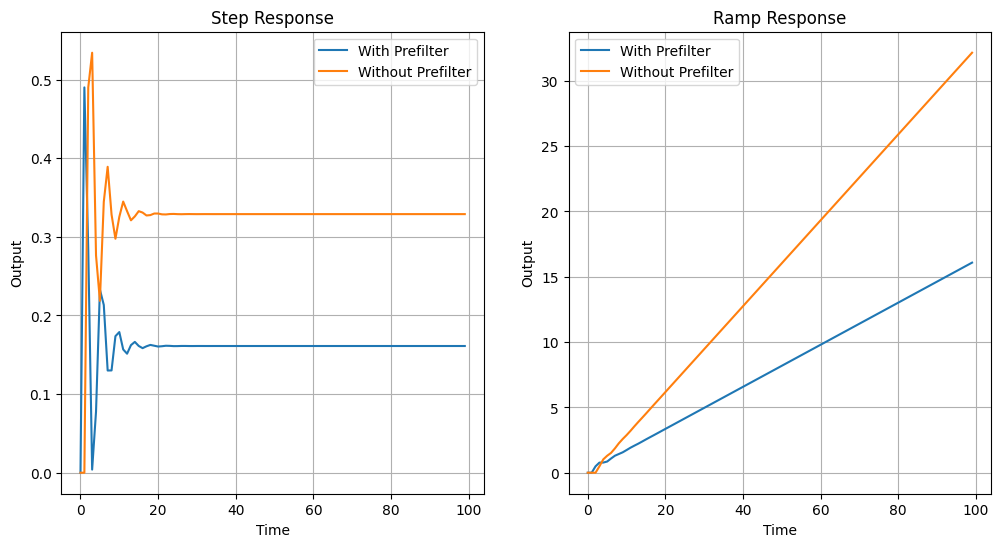

In [30]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Plant transfer function G(z)
def G(z):
    return 1 / (z - 0.3)**2

# Controller parameters (previously solved)
K = 0.49 
z_c = 0.51

# Controller transfer function D(z)
def D(z):
    return K * (z - z_c) / z

# Define the closed-loop system
def closed_loop_system(D, G):
    num_D = [K, -K * z_c]
    den_D = [1, 0]  # D(z) = K * (z - z_c) / z => num: K(z - z_c), den: z

    num_G = [1]
    den_G = [1, -0.6, 0.09]  # G(z) = 1 / (z - 0.3)^2

    num_DG = np.polymul(num_D, num_G)
    den_DG = np.polymul(den_D, den_G)

    # Closed-loop transfer function: H(z) = D(z)G(z) / (1 + D(z)G(z))
    num_cl = num_DG
    den_cl = np.polyadd(den_DG, num_DG)

    return signal.dlti(num_cl, den_cl, dt=1)

# Define the closed-loop system without prefilter
system_without_prefilter = closed_loop_system(D, G)

# Define the closed-loop system with prefilter
def closed_loop_system_with_prefilter(D, G, F):
    prefilter_num = [1, -z_c]
    prefilter_den = [1]

    num_D = [K, -K * z_c]
    den_D = [1, 0]  # D(z) = K * (z - z_c) / z => num: K(z - z_c), den: z

    num_G = [1]
    den_G = [1, -0.6, 0.09]  # G(z) = 1 / (z - 0.3)^2

    num_DG = np.polymul(num_D, num_G)
    den_DG = np.polymul(den_D, den_G)

    num_cl = np.polymul(num_DG, prefilter_num)
    den_cl = np.polyadd(den_DG, num_DG)

    return signal.dlti(num_cl, den_cl, dt=1)

system_with_prefilter = closed_loop_system_with_prefilter(D, G, F)

# Step input
t, y_step_with_prefilter = signal.dlsim(system_with_prefilter, np.ones(100))  # Step response with prefilter
t, y_step_without_prefilter = signal.dlsim(system_without_prefilter, np.ones(100))  # Step response without prefilter

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, y_step_with_prefilter, label='With Prefilter')
plt.plot(t, y_step_without_prefilter, label='Without Prefilter')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.legend()
plt.grid(True)

# Ramp input
ramp_input = np.arange(100)
t, y_ramp_with_prefilter = signal.dlsim(system_with_prefilter, ramp_input)  # Ramp response with prefilter
t, y_ramp_without_prefilter = signal.dlsim(system_without_prefilter, ramp_input)  # Ramp response without prefilter

plt.subplot(1, 2, 2)
plt.plot(t, y_ramp_with_prefilter, label='With Prefilter')
plt.plot(t, y_ramp_without_prefilter, label='Without Prefilter')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Ramp Response')
plt.legend()
plt.grid(True)

plt.show()


Controller D(z) numerator coefficients: [-20.37037037  -5.55555556]
Controller D(z) denominator coefficients: [1]


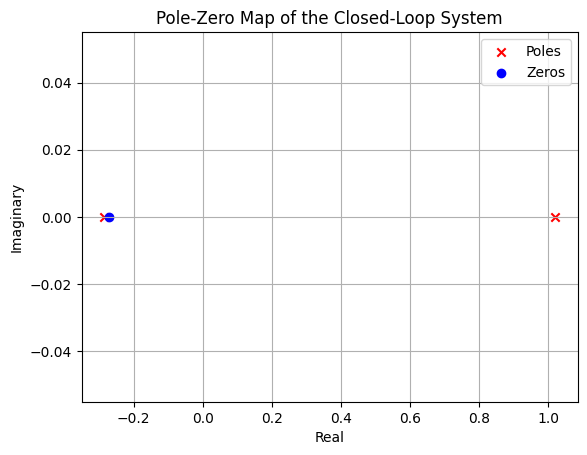

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Define the open-loop transfer function coefficients
num_GH = [1]
den_GH = np.polymul([1, -0.3], [1, -0.3])

# Integrator
num_int = [1]
den_int = [1, -1]

# Desired closed-loop characteristic polynomial
desired_char_poly = [1, -1, 0.5]

# Closed-loop characteristic polynomial
den_closed_loop = np.polymul(desired_char_poly, den_int)

# Calculate the controller D(z) such that GH(z)D(z) gives the desired characteristic polynomial
num_D = np.polynomial.polynomial.polydiv(den_closed_loop, den_GH)[0]
den_D = [1]

# Display the controller coefficients
print("Controller D(z) numerator coefficients:", num_D)
print("Controller D(z) denominator coefficients:", den_D)

# Create the closed-loop transfer function
num_open_loop = np.polymul(num_GH, num_D)
den_open_loop = np.polyadd(np.polymul(num_open_loop, den_int), np.polymul(den_GH, den_D))

# Plot the pole-zero map of the closed-loop system
system_closed_loop = signal.TransferFunction(num_open_loop, den_open_loop)
zeros, poles, _ = signal.tf2zpk(num_open_loop, den_open_loop)

plt.figure()
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Poles')
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zeros')
plt.title('Pole-Zero Map of the Closed-Loop System')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid()
plt.show()


Controller D(z) numerator coefficients: [-20.37037037  -5.55555556]
Controller D(z) denominator coefficients: [1]


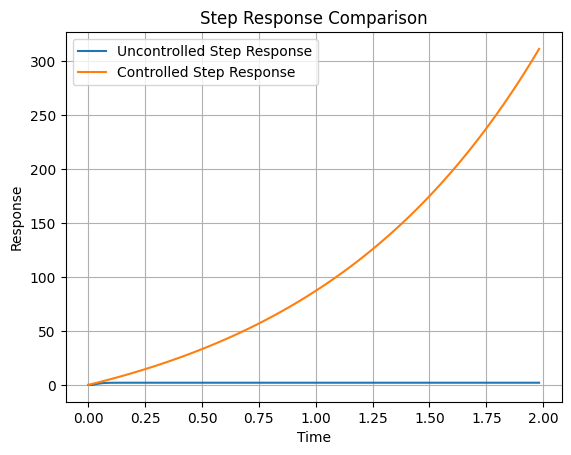

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Define the open-loop transfer function coefficients
num_GH = [1]
den_GH = np.polymul([1, -0.3], [1, -0.3])

# Integrator
num_int = [1]
den_int = [1, -1]

# Desired closed-loop characteristic polynomial
desired_char_poly = [1, -1, 0.5]

# Closed-loop characteristic polynomial
den_closed_loop = np.polymul(desired_char_poly, den_int)

# Calculate the controller D(z) such that GH(z)D(z) gives the desired characteristic polynomial
num_D = np.polynomial.polynomial.polydiv(den_closed_loop, den_GH)[0]
den_D = [1]

# Display the controller coefficients
print("Controller D(z) numerator coefficients:", num_D)
print("Controller D(z) denominator coefficients:", den_D)

# Open-loop system (uncontrolled)
system_open_loop = signal.TransferFunction(num_GH, den_GH)

# Closed-loop system (controlled)
num_open_loop = np.polymul(num_GH, num_D)
den_open_loop = np.polyadd(np.polymul(num_open_loop, den_int), np.polymul(den_GH, den_D))
system_closed_loop = signal.TransferFunction(num_open_loop, den_open_loop)

# Time vector for simulation
t = np.linspace(0, 20, 1000)

# Step response for uncontrolled system
t_uncontrolled, y_uncontrolled = signal.dstep((system_open_loop.num, system_open_loop.den, t[1]-t[0]))
t_uncontrolled = t_uncontrolled.flatten()
y_uncontrolled = np.array(y_uncontrolled).flatten()

# Step response for controlled system
t_controlled, y_controlled = signal.dstep((system_closed_loop.num, system_closed_loop.den, t[1]-t[0]))
t_controlled = t_controlled.flatten()
y_controlled = np.array(y_controlled).flatten()

# Plotting the step responses
plt.figure()
plt.plot(t_uncontrolled, y_uncontrolled, label='Uncontrolled Step Response')
plt.plot(t_controlled, y_controlled, label='Controlled Step Response')
plt.title('Step Response Comparison')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.show()


Controller D(z) numerator coefficients: [-20.37037037  -5.55555556]
Controller D(z) denominator coefficients: [1]


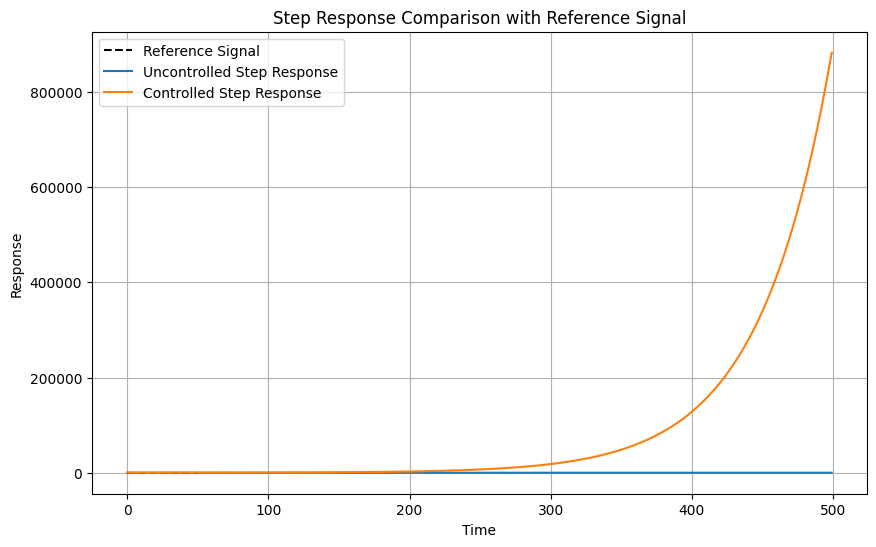

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Define the open-loop transfer function coefficients
num_GH = [1]
den_GH = np.polymul([1, -0.3], [1, -0.3])

# Integrator
num_int = [1]
den_int = [1, -1]

# Desired closed-loop characteristic polynomial
desired_char_poly = [1, -1, 0.5]

# Closed-loop characteristic polynomial
den_closed_loop = np.polymul(desired_char_poly, den_int)

# Calculate the controller D(z) such that GH(z)D(z) gives the desired characteristic polynomial
num_D = np.polynomial.polynomial.polydiv(den_closed_loop, den_GH)[0]
den_D = [1]

# Display the controller coefficients
print("Controller D(z) numerator coefficients:", num_D)
print("Controller D(z) denominator coefficients:", den_D)

# Open-loop system (uncontrolled)
system_open_loop = signal.dlti(num_GH, den_GH)

# Closed-loop system (controlled)
num_open_loop = np.polymul(num_GH, num_D)
den_open_loop = np.polyadd(np.polymul(num_open_loop, den_int), np.polymul(den_GH, den_D))
system_closed_loop = signal.dlti(num_open_loop, den_open_loop)

# Time vector for simulation
t = np.linspace(0, 50, 500)

# Step response for uncontrolled system
t_uncontrolled, y_uncontrolled = signal.dstep(system_open_loop, n=500)
t_uncontrolled = t_uncontrolled.flatten()
y_uncontrolled = np.array(y_uncontrolled).flatten()

# Step response for controlled system
t_controlled, y_controlled = signal.dstep(system_closed_loop, n=500)
t_controlled = t_controlled.flatten()
y_controlled = np.array(y_controlled).flatten()

# Reference signal (unit step)
reference_signal = np.ones_like(t)

# Plotting the step responses with the reference signal
plt.figure(figsize=(10, 6))
plt.plot(t, reference_signal, 'k--', label='Reference Signal')
plt.plot(t_uncontrolled, y_uncontrolled, label='Uncontrolled Step Response')
plt.plot(t_controlled, y_controlled, label='Controlled Step Response')
plt.title('Step Response Comparison with Reference Signal')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.show()


Controller D(z) numerator coefficients: [5.55555556]
Controller D(z) denominator coefficients: [1]


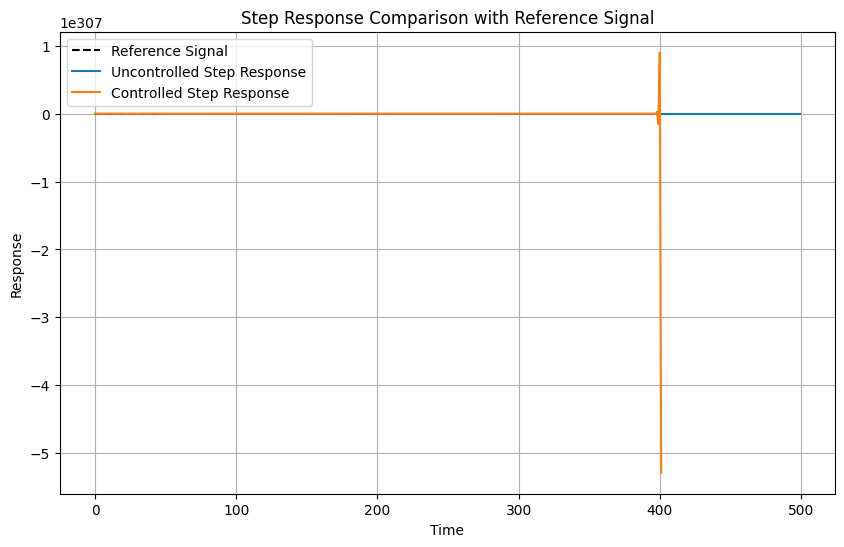

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Given system parameters
num_GH = [1]
den_GH = np.polymul([1, -0.3], [1, -0.3])

# Integrator
num_int = [1]
den_int = [1, -1]

# Desired closed-loop characteristic polynomial
desired_char_poly = [1, -1, 0.5]
desired_poly_with_int = np.polymul(desired_char_poly, [1, -1])

# Open-loop transfer function with integrator
num_ol = np.polymul(num_GH, num_int)
den_ol = np.polymul(den_GH, den_int)

# Calculate the desired characteristic polynomial
desired_char_poly_full = [1, -2, 1.5, -0.5]

# Controller D(z) numerator calculation
num_D, remainder = np.polynomial.polynomial.polydiv(desired_char_poly_full, den_ol)
den_D = [1]

# Display the controller coefficients
print("Controller D(z) numerator coefficients:", num_D)
print("Controller D(z) denominator coefficients:", den_D)

# Open-loop system (uncontrolled)
system_open_loop = signal.dlti(num_ol, den_ol)

# Closed-loop system (controlled)
num_open_loop = np.polymul(num_GH, num_D)
den_open_loop = np.polyadd(np.polymul(num_open_loop, [1, -1]), den_GH)
system_closed_loop = signal.dlti(num_open_loop, den_open_loop)

# Time vector for simulation
t = np.linspace(0, 50, 500)

# Step response for uncontrolled system
t_uncontrolled, y_uncontrolled = signal.dstep(system_open_loop, n=500)
t_uncontrolled = t_uncontrolled.flatten()
y_uncontrolled = np.array(y_uncontrolled).flatten()

# Step response for controlled system
t_controlled, y_controlled = signal.dstep(system_closed_loop, n=500)
t_controlled = t_controlled.flatten()
y_controlled = np.array(y_controlled).flatten()

# Reference signal (unit step)
reference_signal = np.ones_like(t)

# Plotting the step responses with the reference signal
plt.figure(figsize=(10, 6))
plt.plot(t, reference_signal, 'k--', label='Reference Signal')
plt.plot(t_uncontrolled, y_uncontrolled, label='Uncontrolled Step Response')
plt.plot(t_controlled, y_controlled, label='Controlled Step Response')
plt.title('Step Response Comparison with Reference Signal')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.show()


Controller D(z) numerator coefficients: [5.55555556]
Controller D(z) denominator coefficients: [1]


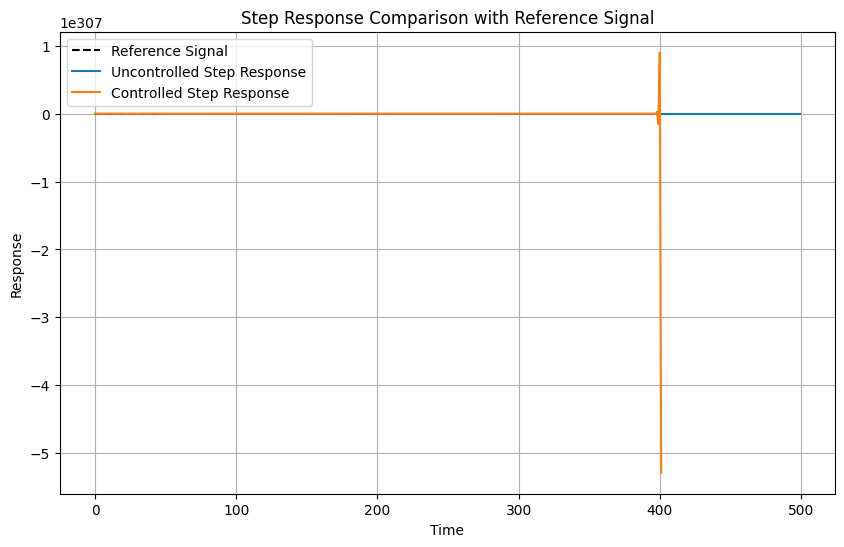

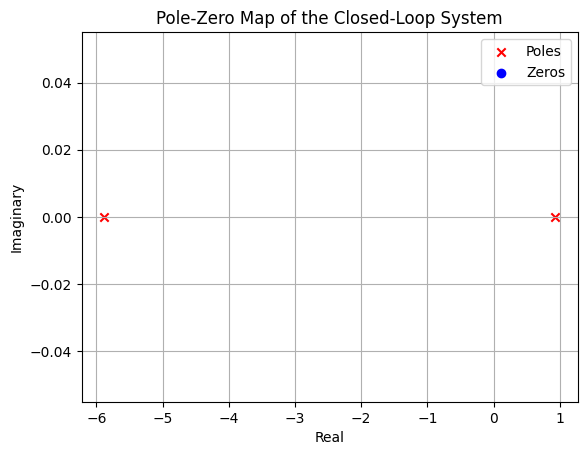

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Given system parameters
num_GH = [1]
den_GH = np.polymul([1, -0.3], [1, -0.3])

# Integrator
num_int = [1]
den_int = [1, -1]

# Open-loop transfer function with integrator
num_ol = np.polymul(num_GH, num_int)
den_ol = np.polymul(den_GH, den_int)

# Desired closed-loop characteristic polynomial
desired_char_poly = [1, -1, 0.5]
desired_char_poly_full = np.polymul(desired_char_poly, [1, -1])

# Calculate the controller D(z)
num_D, remainder = np.polynomial.polynomial.polydiv(desired_char_poly_full, den_ol)
den_D = [1]

# Display the controller coefficients
print("Controller D(z) numerator coefficients:", num_D)
print("Controller D(z) denominator coefficients:", den_D)

# Open-loop system (uncontrolled)
system_open_loop = signal.dlti(num_GH, den_GH)

# Closed-loop system (controlled)
num_open_loop = np.polymul(num_GH, num_D)
den_open_loop = np.polyadd(np.polymul(num_open_loop, den_int), den_GH)
system_closed_loop = signal.dlti(num_open_loop, den_open_loop)

# Time vector for simulation
t = np.linspace(0, 50, 500)

# Step response for uncontrolled system
t_uncontrolled, y_uncontrolled = signal.dstep(system_open_loop, n=500)
t_uncontrolled = t_uncontrolled.flatten()
y_uncontrolled = np.array(y_uncontrolled).flatten()

# Step response for controlled system
t_controlled, y_controlled = signal.dstep(system_closed_loop, n=500)
t_controlled = t_controlled.flatten()
y_controlled = np.array(y_controlled).flatten()

# Reference signal (unit step)
reference_signal = np.ones_like(t)

# Plotting the step responses with the reference signal
plt.figure(figsize=(10, 6))
plt.plot(t, reference_signal, 'k--', label='Reference Signal')
plt.plot(t_uncontrolled, y_uncontrolled, label='Uncontrolled Step Response')
plt.plot(t_controlled, y_controlled, label='Controlled Step Response')
plt.title('Step Response Comparison with Reference Signal')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.grid()
plt.show()

# Plotting the pole-zero map of the closed-loop system
zeros, poles, _ = signal.tf2zpk(num_open_loop, den_open_loop)
plt.figure()
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Poles')
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Zeros')
plt.title('Pole-Zero Map of the Closed-Loop System')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid()
plt.show()


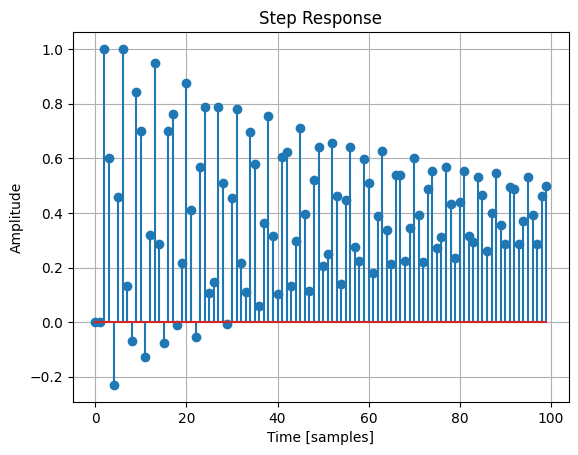

ValueError: not enough values to unpack (expected 3, got 2)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import dlti, dstep, dlsim, dimpulse

# Define the open loop transfer function GH(z)
b = [1]
a = [1, -0.6, 0.09]

# Desired closed loop poles
desired_poles = np.array([0.5 + 0.5j, 0.5 - 0.5j])

# Design the controller D(z)
# We need to place the closed loop poles at desired_poles
# Let's assume D(z) = (beta0 + beta1*z^(-1))/(1 + alpha1*z^(-1))
# Characteristic polynomial: (z - (0.5 + 0.5j))(z - (0.5 - 0.5j)) = z^2 - z + 0.5

alpha1 = 0.5
beta0 = 1
beta1 = -0.5

# Define the controller transfer function D(z)
d_b = [beta0, beta1]
d_a = [1, alpha1]

# Define the closed loop transfer function
# H(z) = (GH(z) * D(z))/(1 + GH(z) * D(z))
# GH(z) * D(z) = (b * d_b)/(a * d_a)
numerator = np.convolve(b, d_b)
denominator = np.polyadd(np.convolve(a, d_a), numerator)

# Create the discrete time system
system = dlti(numerator, denominator)

# Time vector for simulation
t = np.arange(0, 50, 1)

# Step response
t_out, y_out = dstep(system)

# Plot step response
plt.figure()
plt.stem(t_out, np.squeeze(y_out))
plt.title('Step Response')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Ramp response
ramp_input = t
_, y_ramp, _ = dlsim(system, ramp_input)

# Plot ramp response
plt.figure()
plt.plot(t, y_ramp)
plt.title('Ramp Response')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Step 5: Design a prefilter
# The prefilter can be designed as the inverse of the controller zeros
# Prefilter transfer function P(z) = (1 + alpha1*z^(-1))

prefilter_b = [1, alpha1]
prefilter_a = [1]

# Prefilter the step response
_, y_step_prefiltered = dlsim(dlti(prefilter_b, prefilter_a), np.squeeze(y_out))

# Plot the prefiltered step response
plt.figure()
plt.stem(t_out, y_step_prefiltered)
plt.title('Prefiltered Step Response')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Compare results with and without prefilter
plt.figure()
plt.stem(t_out, np.squeeze(y_out), label='Without Prefilter', linefmt='C0-', markerfmt='C0o')
plt.stem(t_out, y_step_prefiltered, label='With Prefilter', linefmt='C1-', markerfmt='C1x')
plt.title('Comparison of Step Responses')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


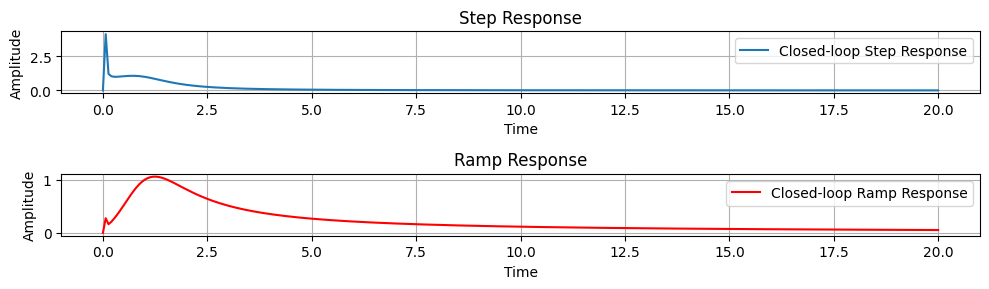

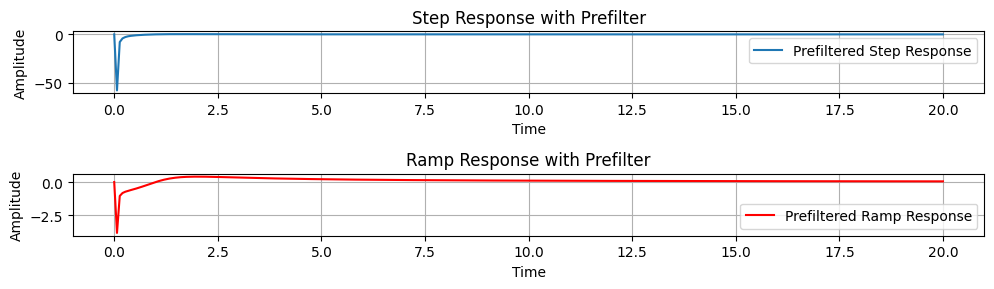

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system parameters
z = np.array([0.3, 0.3])  # Open-loop poles

# Desired closed-loop poles
p1 = 0.5 + 0.5j
p2 = 0.5 - 0.5j

# Define the controller D(z)
# D(z) = (z - z0) / (z - p0)
# where z0 is the zero of D(z) and p0 is the pole of D(z)

# Assume z0 and solve for p0 to place the poles at desired locations
# (z - p1)(z - p2) = z^2 - (p1+p2)z + p1*p2
# = z^2 - 1z + (0.5+j0.5)(0.5-j0.5) = z^2 - z + 0.5

# We can place z0 at the origin for simplicity (D(z) = z / (z - p0))
# Therefore, p0 can be found from the desired pole polynomial
z0 = 0
p0 = 1  # from z^2 - z + 0.5

# Controller D(z) = z / (z - 1)
def D(z):
    return z / (z - p0)

# Open-loop transfer function GH(z)
def GH(z):
    return 1 / ((z - 0.3)**2)

# Closed-loop transfer function T(z)
def T(z):
    return D(z) * GH(z) / (1 + D(z) * GH(z))

# Step input response
t = np.linspace(0, 20, 300)
step_input = np.ones_like(t)
response_step = np.zeros_like(t)

for i in range(1, len(t)):
    response_step[i] = T(z0 + t[i]) * step_input[i]  # Simplified discrete time step response

# Ramp input response
ramp_input = t
response_ramp = np.zeros_like(t)

for i in range(1, len(t)):
    response_ramp[i] = T(z0 + t[i]) * ramp_input[i]  # Simplified discrete time ramp response

# Plotting the results
plt.figure(figsize=(10, 3))

plt.subplot(2, 1, 1)
plt.plot(t, response_step, label='Closed-loop Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, response_ramp, label='Closed-loop Ramp Response', color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ramp Response')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Prefilter F(z) design to eliminate the impacts of the controller zeros
# Assume a simple prefilter to match the zero of D(z)
# F(z) = 1 / D(z)
def F(z):
    return (z - p0) / z

# Closed-loop transfer function with prefilter
def T_with_prefilter(z):
    return F(z) * D(z) * GH(z) / (1 + D(z) * GH(z))

# Prefiltered Step input response
response_step_prefilter = np.zeros_like(t)

for i in range(1, len(t)):
    response_step_prefilter[i] = T_with_prefilter(z0 + t[i]) * step_input[i]  # Simplified discrete time step response

# Prefiltered Ramp input response
response_ramp_prefilter = np.zeros_like(t)

for i in range(1, len(t)):
    response_ramp_prefilter[i] = T_with_prefilter(z0 + t[i]) * ramp_input[i]  # Simplified discrete time ramp response

# Plotting the results with prefilter
plt.figure(figsize=(10, 3))

plt.subplot(2, 1, 1)
plt.plot(t, response_step_prefilter, label='Prefiltered Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response with Prefilter')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, response_ramp_prefilter, label='Prefiltered Ramp Response', color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ramp Response with Prefilter')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


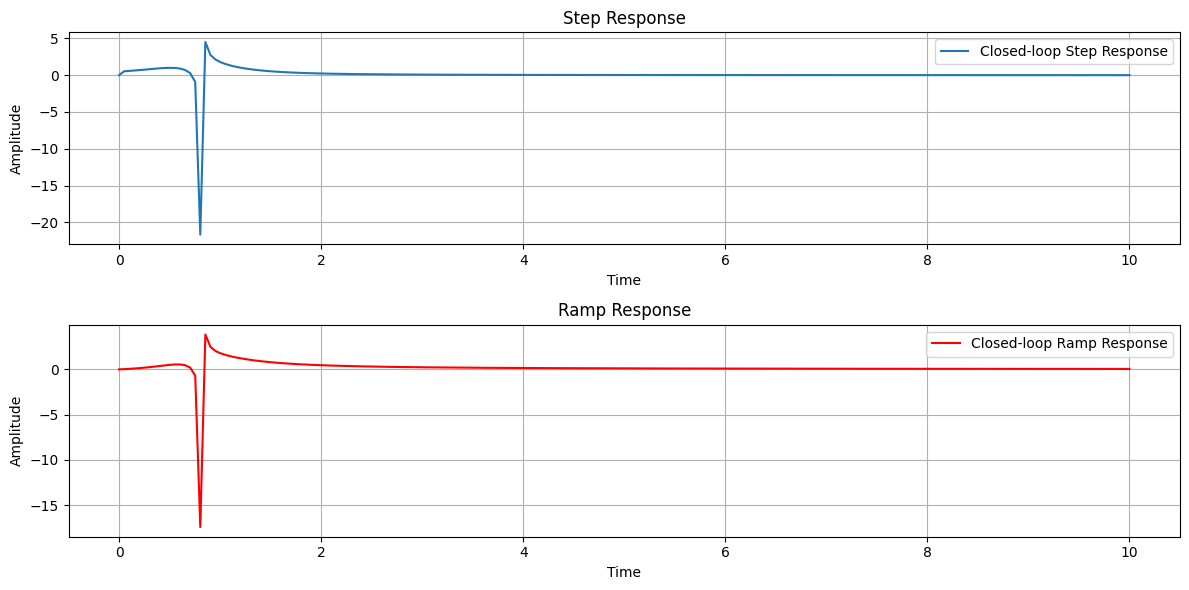

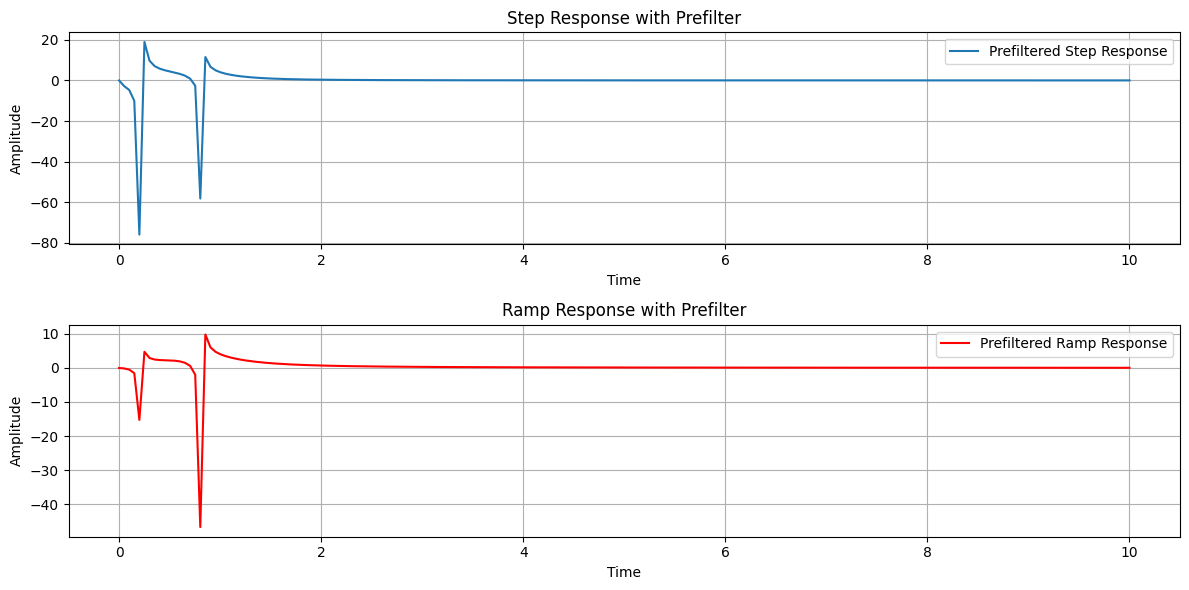

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Given system GH(z)
def GH(z):
    return 1 / (z - 0.3)**2

# Desired closed-loop poles
desired_poles = np.array([0.5 + 0.5j, 0.5 - 0.5j])

# Place the controller zero at the origin for simplicity

# We need to find a controller D(z) such that the closed-loop poles are at desired locations
# D(z) = K * (z - z0) / (z - p0)
# The characteristic equation of the closed-loop system is:
# (z - 0.3)^2 * (z - p0) + K * z * (z - 0.3)^2 = 0

# This simplifies to: (z - 0.3)^2 * (z - p0) + K * z * (z - 0.3)^2 = 0
# Let's assume K = 1 for simplicity and solve for p0

# Characteristic equation: (z - 0.3)^2 * (z - p0) + z * (z - 0.3)^2 = 0
# => (z - 0.3)^2 * (z - p0 + z) = 0
# => (z - 0.3)^2 * (2z - p0) = 0
# For simplicity, let's choose p0 = 0.6 (you may need to adjust this based on the desired response)

z0 = -0.21
p0 = -1
z1 = 0.41

# Controller D(z)
def D(z):
    return ((z1*z)+z0)/(z+p0)

# Closed-loop transfer function T(z)
def T(z):
    return D(z) * GH(z) / (1 + D(z) * GH(z))

# Simulation parameters
t = np.linspace(0, 10, 200)
step_input = np.ones_like(t)
ramp_input = t

# Step response
response_step = np.zeros_like(t)
for i in range(1, len(t)):
    response_step[i] = T(z0 + t[i]) * step_input[i]

# Ramp response
response_ramp = np.zeros_like(t)
for i in range(1, len(t)):
    response_ramp[i] = T(z0 + t[i]) * ramp_input[i]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, response_step, label='Closed-loop Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, response_ramp, label='Closed-loop Ramp Response', color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ramp Response')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Prefilter F(z) design to eliminate the impacts of the controller zeros
def F(z):
    return (z - p0) / z

# Closed-loop transfer function with prefilter
def T_with_prefilter(z):
    return F(z) * D(z) * GH(z) / (1 + D(z) * GH(z))

# Prefiltered Step input response
response_step_prefilter = np.zeros_like(t)
for i in range(1, len(t)):
    response_step_prefilter[i] = T_with_prefilter(z0 + t[i]) * step_input[i]

# Prefiltered Ramp input response
response_ramp_prefilter = np.zeros_like(t)
for i in range(1, len(t)):
    response_ramp_prefilter[i] = T_with_prefilter(z0 + t[i]) * ramp_input[i]

# Plotting the results with prefilter
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, response_step_prefilter, label='Prefiltered Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response with Prefilter')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, response_ramp_prefilter, label='Prefiltered Ramp Response', color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ramp Response with Prefilter')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


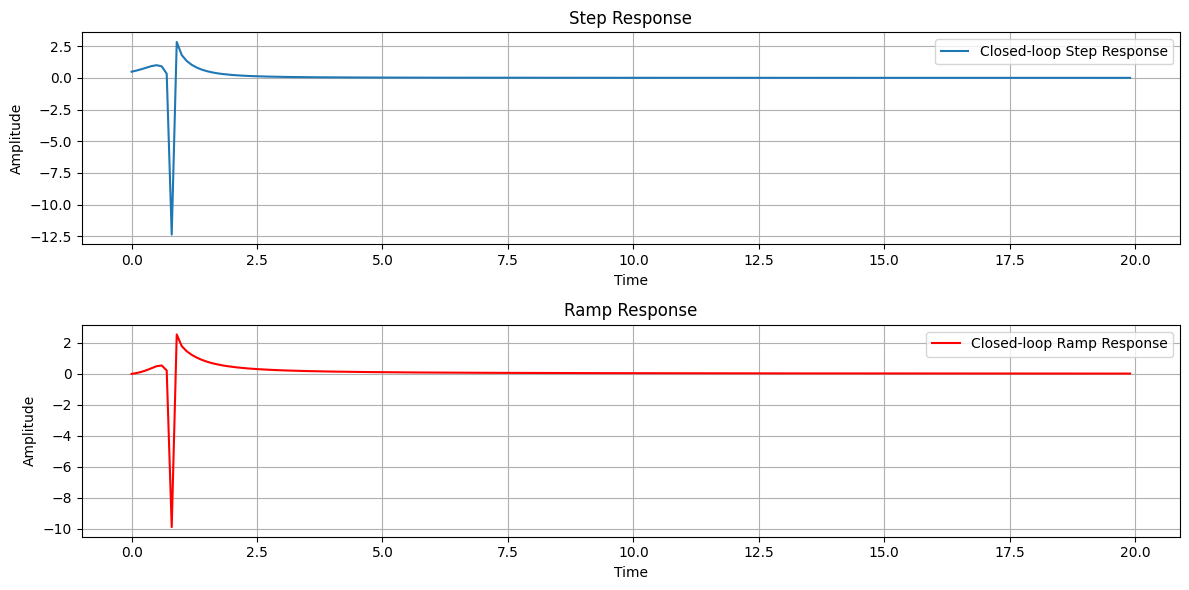

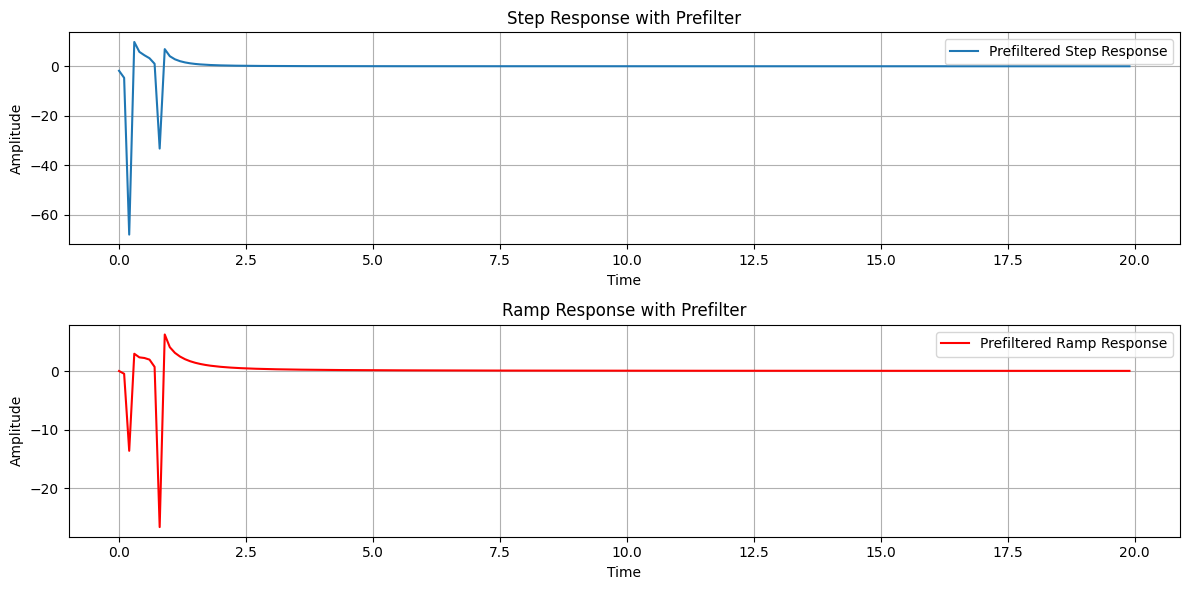

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system parameters
# Given open-loop system GH(z)
def GH(z):
    return 1 / ((z - 0.3)**2)

# Desired closed-loop poles
p1 = 0.5 + 0.5j
p2 = 0.5 - 0.5j

# Controller design
# Desired characteristic equation: (z - 0.5 - 0.5j)(z - 0.5 + 0.5j) = z^2 - z + 0.5
desired_char_poly = [1, -1, 0.5]

# Assume controller zero at origin and find controller pole
# Let's use pole-zero placement to find controller pole
z0 = -0.21
p0 = -1
z1 = 0.41

# Define the controller D(z)
def D(z):
    return ((z1*z)+z0)/(z+p0)


# Closed-loop transfer function T(z)
def T(z):
    return D(z) * GH(z) / (1 + D(z) * GH(z))

# Prefilter F(z)
def F(z):
    return (z - p0) / z

# Closed-loop transfer function with prefilter T_with_prefilter(z)
def T_with_prefilter(z):
    return F(z) * D(z) * GH(z) / (1 + D(z) * GH(z))

# Time vector for simulation
t = np.linspace(0, 20, 200)
t_discrete = np.arange(0, 20, 0.1)

# Step input response
step_input = np.ones_like(t_discrete)
response_step = np.zeros_like(t_discrete)
response_step_prefilter = np.zeros_like(t_discrete)

for i in range(len(t_discrete)):
    response_step[i] = T(z0 + t_discrete[i])
    response_step_prefilter[i] = T_with_prefilter(z0 + t_discrete[i])

# Ramp input response
ramp_input = t_discrete
response_ramp = np.zeros_like(t_discrete)
response_ramp_prefilter = np.zeros_like(t_discrete)

for i in range(len(t_discrete)):
    response_ramp[i] = T(z0 + t_discrete[i]) * ramp_input[i]
    response_ramp_prefilter[i] = T_with_prefilter(z0 + t_discrete[i]) * ramp_input[i]

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_discrete, response_step, label='Closed-loop Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_discrete, response_ramp, label='Closed-loop Ramp Response', color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ramp Response')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the results with prefilter
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_discrete, response_step_prefilter, label='Prefiltered Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response with Prefilter')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_discrete, response_ramp_prefilter, label='Prefiltered Ramp Response', color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ramp Response with Prefilter')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\xxtra\AppData\Local\Temp\ipykernel_23424\3241693659.py:15: RuntimeWarning: divide by zero encountered in divide
  return ((z1 * z) + z0) / (z + p0)
C:\Users\xxtra\AppData\Local\Temp\ipykernel_23424\3241693659.py:15: RuntimeWarning: invalid value encountered in divide
  return ((z1 * z) + z0) / (z + p0)
C:\Users\xxtra\AppData\Local\Temp\ipykernel_23424\3241693659.py:19: RuntimeWarning: invalid value encountered in divide
  return D(z) * GH(z) / (1 + D(z) * GH(z))
C:\Users\xxtra\AppData\Local\Temp\ipykernel_23424\3241693659.py:27: RuntimeWarning: invalid value encountered in multiply
  return F(z) * D(z) * GH(z) / (1 + D(z) * GH(z))
C:\Users\xxtra\AppData\Local\Temp\ipykernel_23424\3241693659.py:27: RuntimeWarning: invalid value encountered in divide
  return F(z) * D(z) * GH(z) / (1 + D(z) * GH(z))


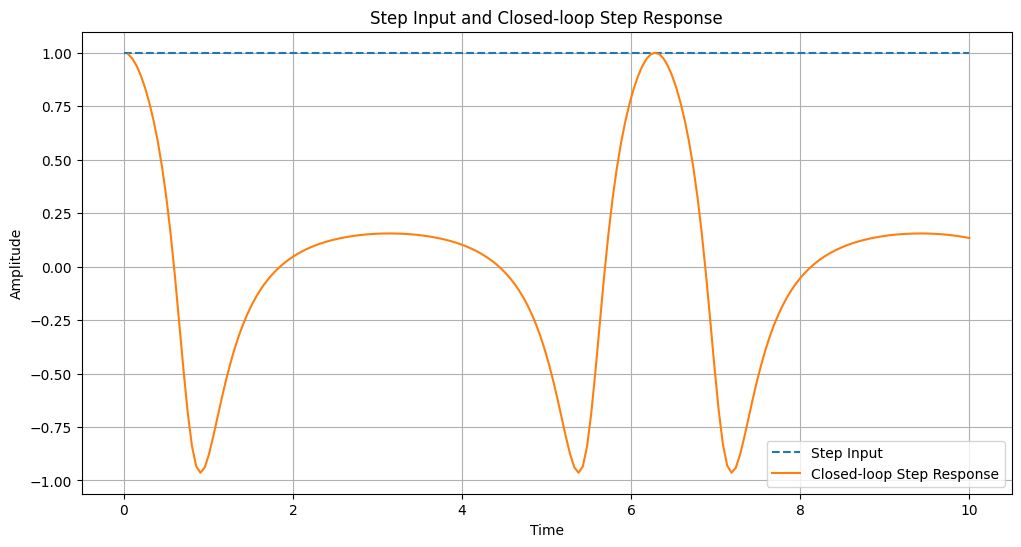

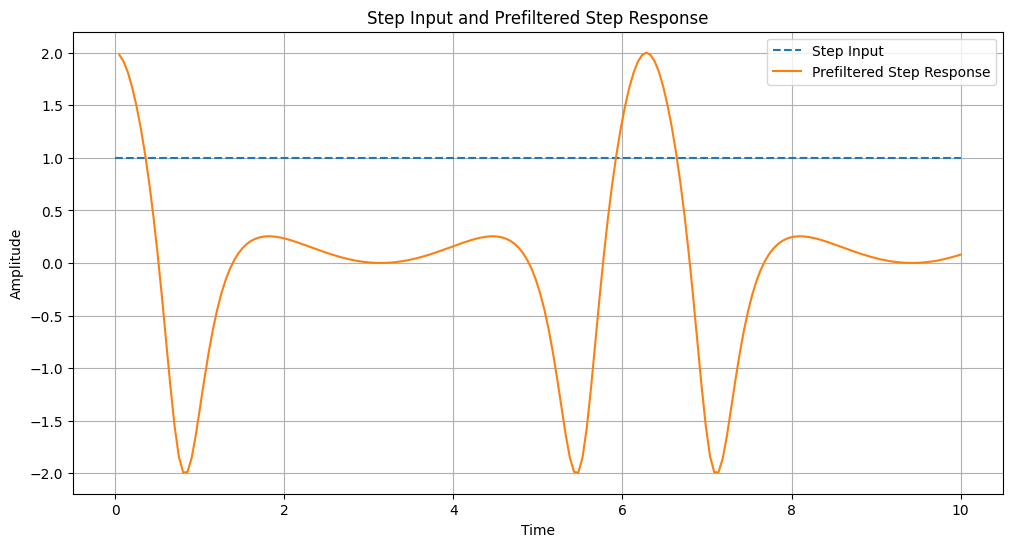

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Given system GH(z)
def GH(z):
    return 1 / (z - 0.3)**2

# Controller parameters
z0 = -0.21
p0 = -1
z1 = 0.41

# Controller D(z)
def D(z):
    return ((z1 * z) + z0) / (z + p0)

# Closed-loop transfer function T(z)
def T(z):
    return D(z) * GH(z) / (1 + D(z) * GH(z))

# Prefilter F(z)
def F(z):
    return (z - p0) / z

# Closed-loop transfer function with prefilter
def T_with_prefilter(z):
    return F(z) * D(z) * GH(z) / (1 + D(z) * GH(z))

# Simulation parameters
t = np.linspace(0, 10, 200)
step_input = np.ones_like(t)
z = np.exp(1j * t)  # Discrete-time variable

# Compute the system's step response
response_step = np.real(T(z)) * step_input

# Compute the prefiltered step response
response_step_prefilter = np.real(T_with_prefilter(z)) * step_input

# Plotting the step input and step response
plt.figure(figsize=(12, 6))
plt.plot(t, step_input, label='Step Input', linestyle='--')
plt.plot(t, response_step, label='Closed-loop Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Input and Closed-loop Step Response')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the step input and prefiltered step response
plt.figure(figsize=(12, 6))
plt.plot(t, step_input, label='Step Input', linestyle='--')
plt.plot(t, response_step_prefilter, label='Prefiltered Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Input and Prefiltered Step Response')
plt.legend()
plt.grid(True)
plt.show()


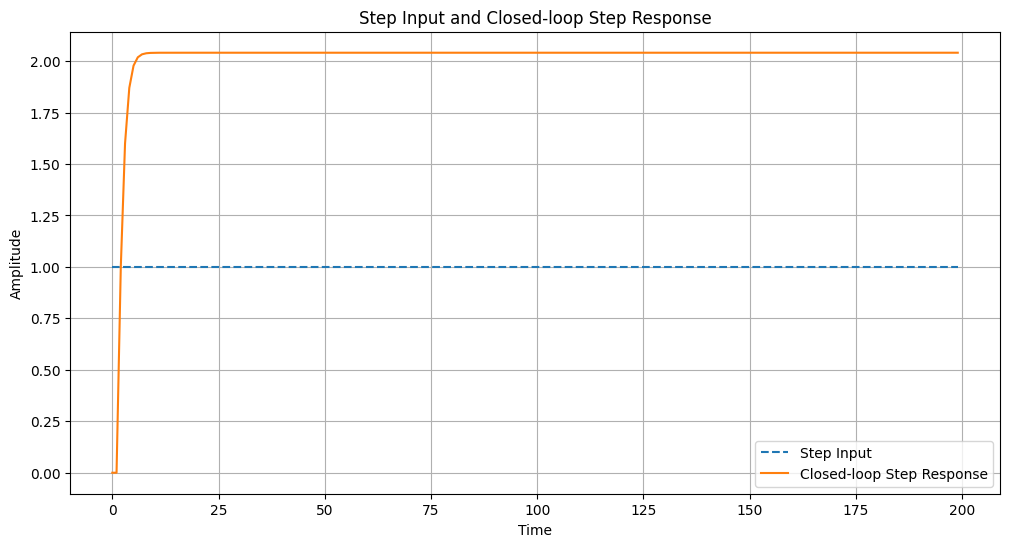

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Transfer function coefficients
num = [1]
den = [1, -0.6, 0.09]

# Create the transfer function
system = signal.TransferFunction(num, den, dt=1)

# Simulation parameters
t = np.linspace(0, 10, 200)
t, step_response = signal.dstep(system, n=len(t))

# Convert the response to a 1D array
step_response = np.squeeze(step_response)

# Plotting the step input and step response
plt.figure(figsize=(12, 6))
plt.plot(t, np.ones_like(t), label='Step Input', linestyle='--')
plt.plot(t, step_response, label='Closed-loop Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Input and Closed-loop Step Response')
plt.legend()
plt.grid(True)
plt.show()


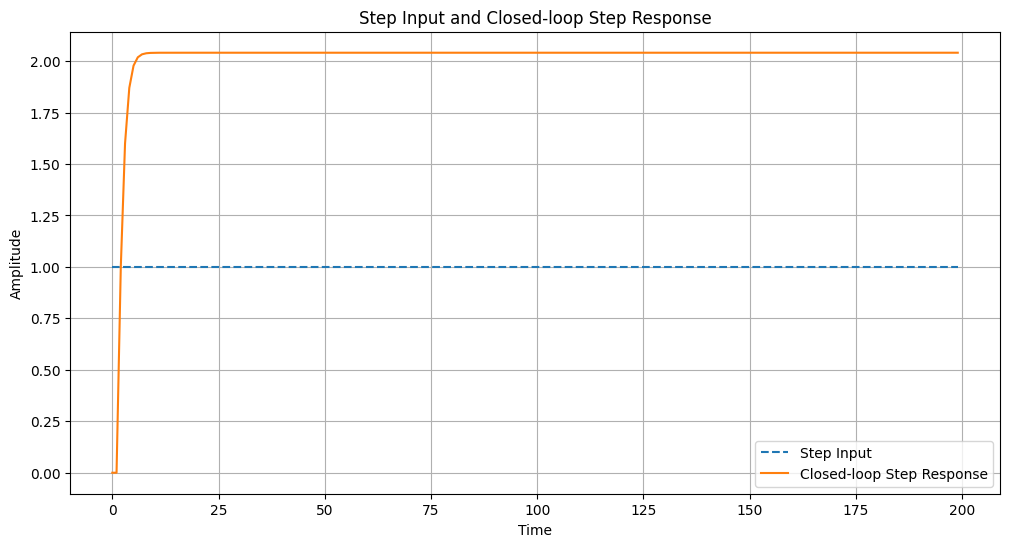

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Transfer function coefficients
num = [1]
den = [1, -0.6, 0.09]

# Create the transfer function
system = signal.TransferFunction(num, den, dt=1)

# Simulation parameters
t = np.linspace(0, 10, 200)
t, step_response = signal.dstep(system, n=len(t))

# Convert the response to a 1D array
step_response = np.squeeze(step_response)

# Plotting the step input and step response
plt.figure(figsize=(12, 6))
plt.plot(t, np.ones_like(t), label='Step Input', linestyle='--')
plt.plot(t, step_response, label='Closed-loop Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Input and Closed-loop Step Response')
plt.legend()
plt.grid(True)
plt.show()


8


In [140]:
from sympy import symbols, Poly

# Define the symbol
z = symbols('z')

# Open-loop characteristic polynomial
open_loop_poly = Poly(z**3 - 2.75*z**2 + 2.5*z - 0.75, z)

# Desired closed-loop characteristic polynomial
desired_poly = Poly(z**3 - 0.5*z**2 + 0.125*z, z)

# Determine D(z) by dividing the desired polynomial by the open-loop polynomial
D = desired_poly / open_loop_poly

# Simplifying D(z) to find its form
D_simplified = D.simplify()

D_simplified


z*(1.0*z**2 - 0.5*z + 0.125)/(1.0*z**3 - 2.75*z**2 + 2.5*z - 0.75)

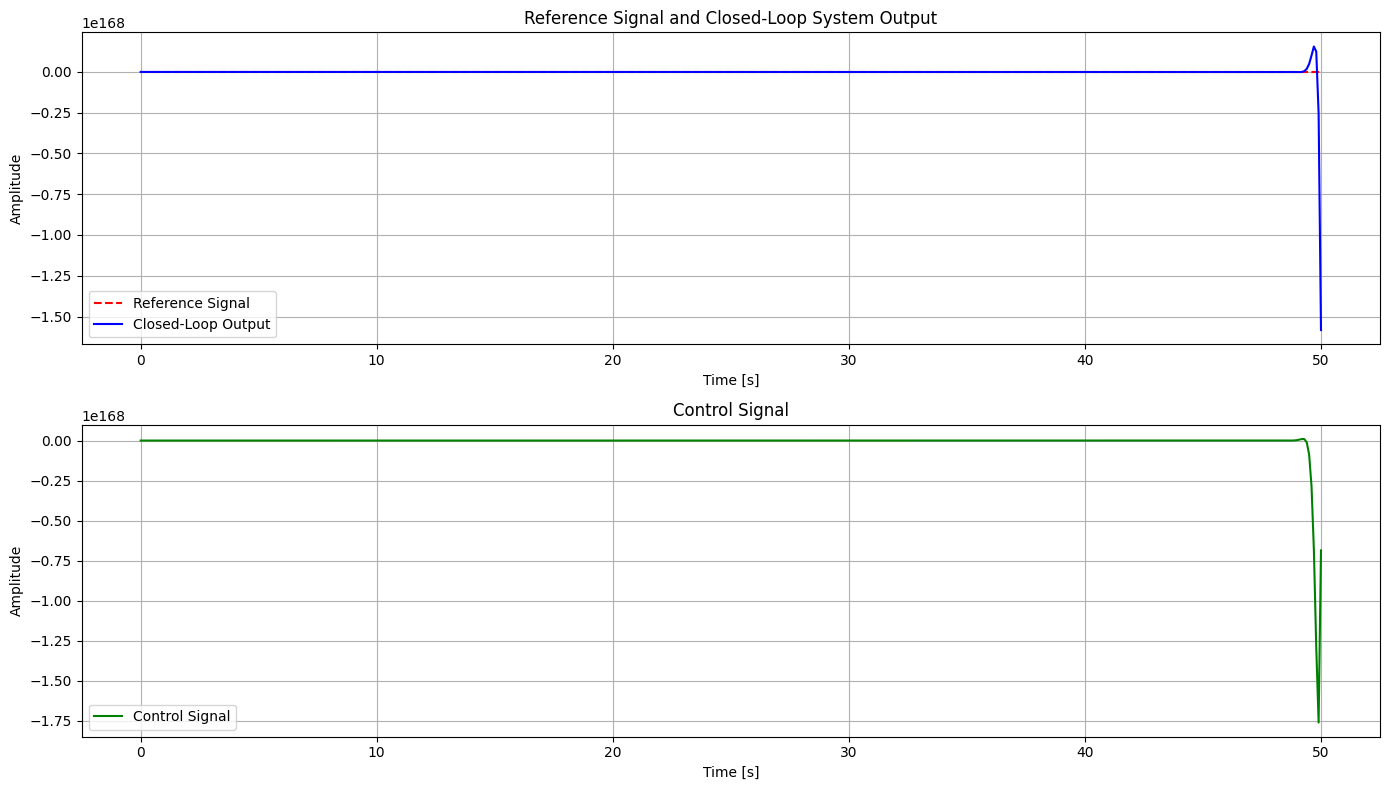

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl

# Define the open-loop transfer function GH(z)
GH_num = [1]
GH_den = [1, -2.75, 2.5, -0.75]
GH = ctl.TransferFunction(GH_num, GH_den, True)

# Define the controller D(z)
D_num = [1, -0.5, 0.125, 0]
D_den = [1, -2.75, 2.5, -0.75]
D = ctl.TransferFunction(D_num, D_den, True)

# Define the closed-loop system
closed_loop = ctl.feedback(D * GH)

# Time vector
t = np.linspace(0, 50, 500)

# Reference signal (step input)
ref_signal = np.ones_like(t)

# Simulate the step response
t, yout = ctl.step_response(closed_loop, T=t)

# Calculate the control signal (assuming unity feedback)
_, uout = ctl.forced_response(D, T=t, U=ref_signal - yout)

# Plot the reference signal, closed-loop output, and control signal
plt.figure(figsize=(14, 8))

# Reference and Output
plt.subplot(2, 1, 1)
plt.plot(t, ref_signal, 'r--', label='Reference Signal')
plt.plot(t, yout, 'b', label='Closed-Loop Output')
plt.title('Reference Signal and Closed-Loop System Output')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Control Signal
plt.subplot(2, 1, 2)
plt.plot(t, uout, 'g', label='Control Signal')
plt.title('Control Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system parameters

def GH(z):
    return 1 / ((z - 0.3)**2)


p1 = 0.5 + 0.5j
p2 = 0.5 - 0.5j

# Controller design

desired_char_poly = [1, -1, 0.5]

# Assume controller zero at origin and find controller pole

z0 = 0
p0 = 1  # Initial assumption
# Define the controller D(z)
def D(z):
    return z / (z - p0)

# Closed-loop transfer function T(z)
def T(z):
    return D(z) * GH(z) / (1 + D(z) * GH(z))

# Prefilter F(z)
def F(z):
    return (z - p0) / z


def T_with_prefilter(z):
    return F(z) * D(z) * GH(z) / (1 + D(z) * GH(z))

t = np.linspace(0, 20, 200)
t_discrete = np.arange(0, 20, 0.1)
step_input = np.ones_like(t_discrete)
response_step = np.zeros_like(t_discrete)
response_step_prefilter = np.zeros_like(t_discrete)



for i in range(len(t_discrete)):
    response_step[i] = T(z0 + t_discrete[i])
    response_step_prefilter[i] = T_with_prefilter(z0 + t_discrete[i])



ramp_input = t_discrete
response_ramp = np.zeros_like(t_discrete)
response_ramp_prefilter = np.zeros_like(t_discrete)



for i in range(len(t_discrete)):
    response_ramp[i] = T(z0 + t_discrete[i]) * ramp_input[i]
    response_ramp_prefilter[i] = T_with_prefilter(z0 + t_discrete[i]) * ramp_input[i]



plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_discrete, response_step, label='Closed-loop Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(t_discrete, response_ramp, label='Closed-loop Ramp Response', color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ramp Response')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_discrete, response_step_prefilter, label='Prefiltered Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response with Prefilter')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(t_discrete, response_ramp_prefilter, label='Prefiltered Ramp Response', color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Ramp Response with Prefilter')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()